In [ ]:
pip install opencv-python matplotlib


In [13]:
import os

# Step 1: Organize the Dataset
dataset_path = '/content/drive/MyDrive/data'
categories = os.listdir(dataset_path)

# Step 2: Load the Dataset and Label the Data
label_dict = {}
images = []
labels = []

for idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    label_dict[category] = idx
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        images.append(image_path)
        labels.append(idx)


# Step 2: Image Preprocessing
def preprocess_images(images, img_height, img_width):
    preprocessed_images = []
    for image_path in images:
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (img_height, img_width))
        normalized_image = resized_image.astype(np.float32) / 255.0  # Normalize pixel values
        preprocessed_images.append(normalized_image)
    return np.array(preprocessed_images)

# Step 3: Split the Dataset
def split_dataset(images, labels, test_size=0.2, val_size=0.25, random_state=42):
    # First, split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)

    # Then, split the training set further into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Define constants

img_height, img_width = 224, 224

images, labels, label_dict = label_data(dataset_path)

preprocessed_images = preprocess_images(images, img_height, img_width)

X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(preprocessed_images, labels)

# Check the shapes of the datasets
print("Training images shape:", X_train.shape)
print("Validation images shape:", X_val.shape)
print("Test images shape:", X_test.shape)
print("Training labels shape:", len(y_train))
print("Validation labels shape:", len(y_val))
print("Test labels shape:", len(y_test))



Training images shape: (70, 224, 224, 3)
Validation images shape: (24, 224, 224, 3)
Test images shape: (24, 224, 224, 3)
Training labels shape: 70
Validation labels shape: 24
Test labels shape: 24


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define model parameters
input_shape = (img_height, img_width, 3)  # Shape of input images
num_classes = len(label_dict)  # Number of output classes

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Convert label lists to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/10
3/3 [==============================] - 15s 4s/step - loss: 6.6606 - accuracy: 0.4286 - val_loss: 1.2643 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 13s 5s/step - loss: 1.1895 - accuracy: 0.5286 - val_loss: 0.9175 - val_accuracy: 0.5833
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 0.6213 - accuracy: 0.7857 - val_loss: 0.7870 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 11s 3s/step - loss: 0.4097 - accuracy: 0.8571 - val_loss: 0.6598 - val_accuracy: 0.7917
Epoch 5/10
3/3 [==============================] - 12s 4s/step - loss: 0.2349 - accuracy: 0.9143 - val_loss: 0.6051 - val_accuracy: 0.7083
Epoch 6/10
3/3 [==============================] - 11s 4s/step - loss: 0.2656 - accuracy: 0.9286 - val_loss: 0.6311 - val_accuracy: 0.7083
Epoch 7/10
3/3 [==============================] - 12s 4s/step - loss: 0.4171 - accuracy: 0.7857 - val_loss: 0.8419 - val_accuracy: 0.6250
Epoch 8/10
3/3 [==================

1/1 [==============================] - 0s 266ms/step


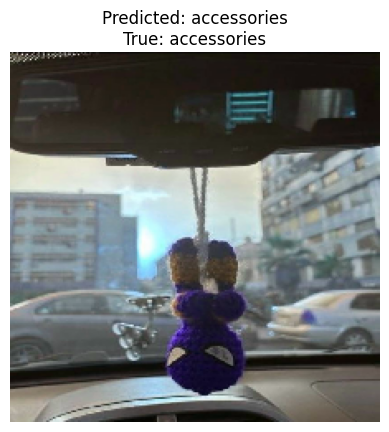

In [17]:
import random
import matplotlib.pyplot as plt

# Select a random index from the test dataset
random_index = random.randint(0, len(X_test) - 1)

# Get the random image and its true label
random_image = X_test[random_index]
true_label = y_test[random_index]

# Reshape the image to (1, height, width, channels) as the model expects a batch of images
random_image = np.expand_dims(random_image, axis=0)

# Predict the label for the random image
predicted_probabilities = model.predict(random_image)
predicted_label = np.argmax(predicted_probabilities)

# Map numerical label to category name using the label_dict
predicted_category = list(label_dict.keys())[list(label_dict.values()).index(predicted_label)]
true_category = list(label_dict.keys())[list(label_dict.values()).index(true_label)]

# Display the image along with the predicted and true labels
plt.imshow(random_image[0])
plt.title(f"Predicted: {predicted_category}\nTrue: {true_category}")
plt.axis('off')
plt.show()


Image path: /content/drive/MyDrive/data/fashion/photo_2024-03-15_00-54-00.jpg
Label: 0

Image path: /content/drive/MyDrive/data/fashion/photo_2024-03-15_00-54-09.jpg
Label: 0

Image path: /content/drive/MyDrive/data/fashion/photo_2024-03-15_00-54-13.jpg
Label: 0

Image path: /content/drive/MyDrive/data/fashion/photo_2024-03-15_00-54-17.jpg
Label: 0

Image path: /content/drive/MyDrive/data/fashion/photo_2024-03-15_00-54-31.jpg
Label: 0



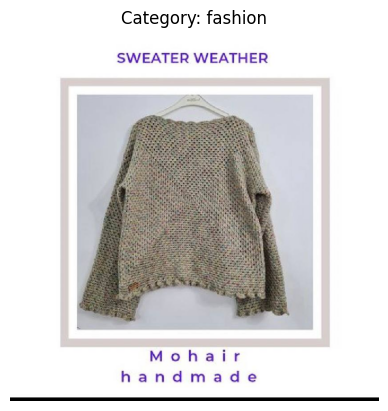

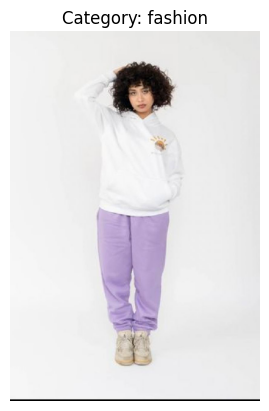

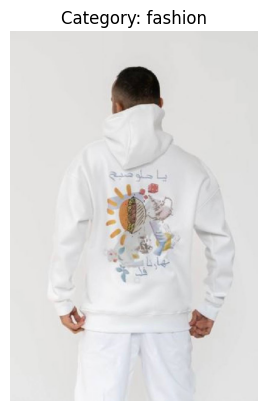

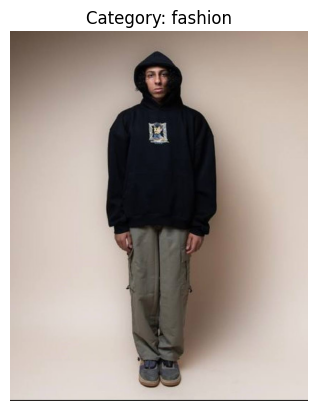

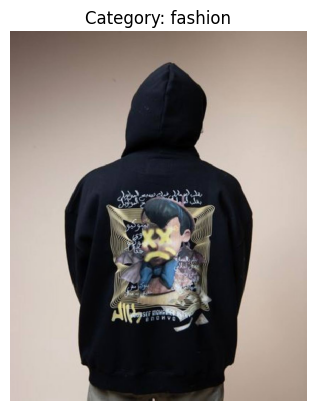

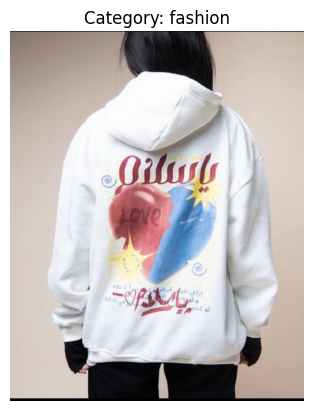

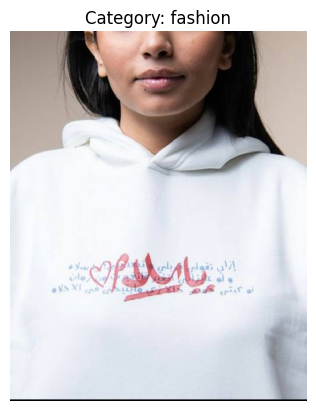

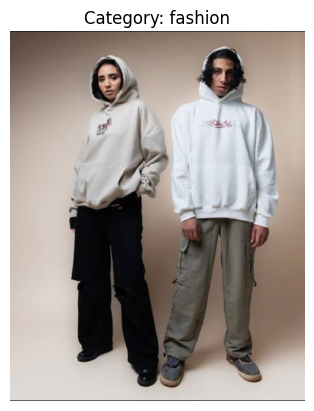

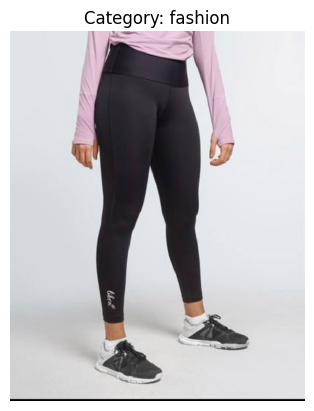

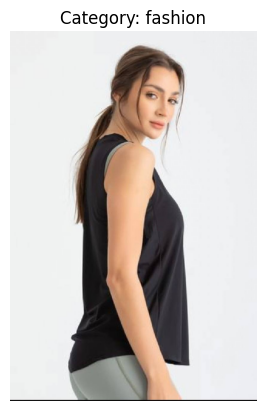

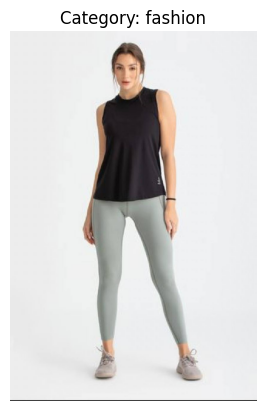

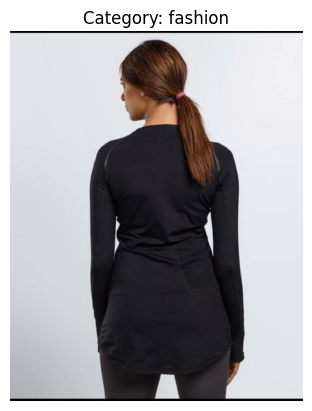

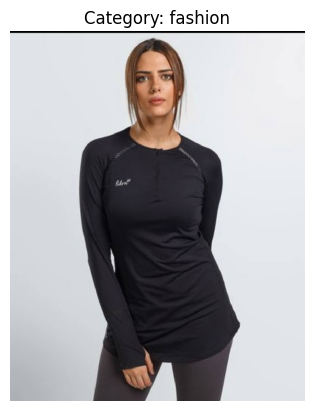

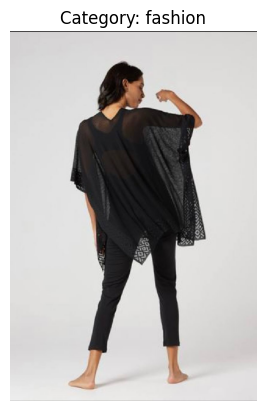

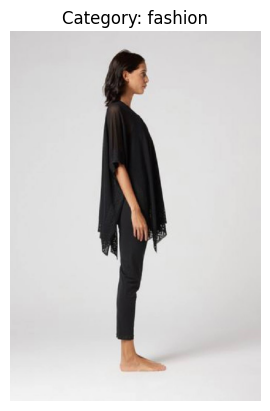

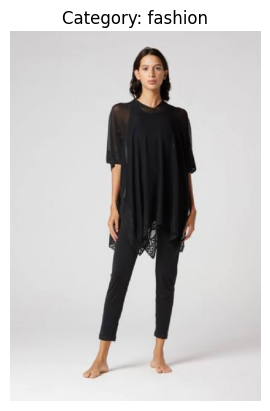

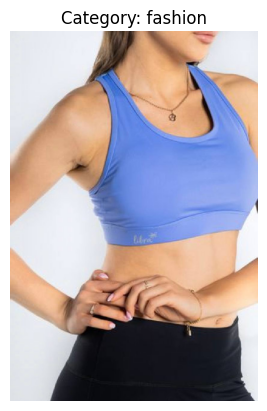

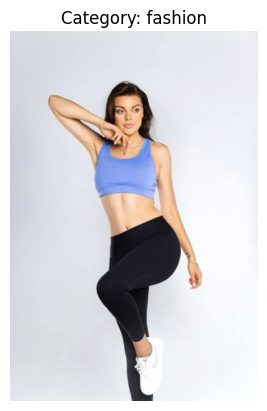

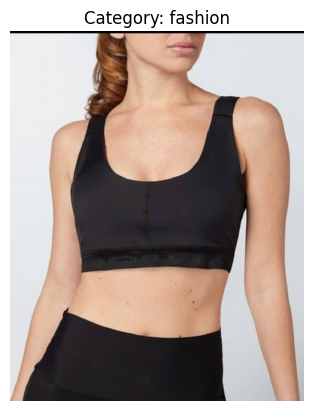

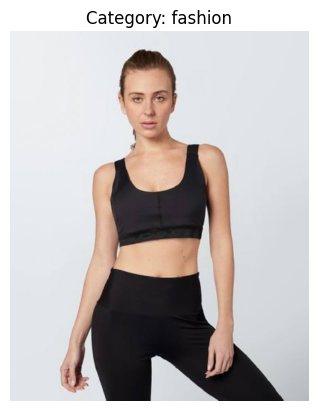

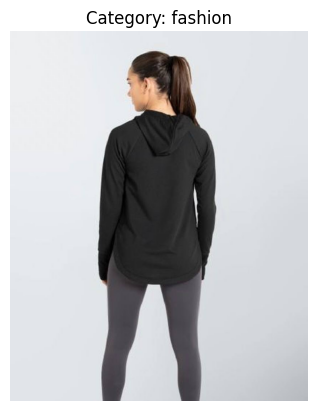

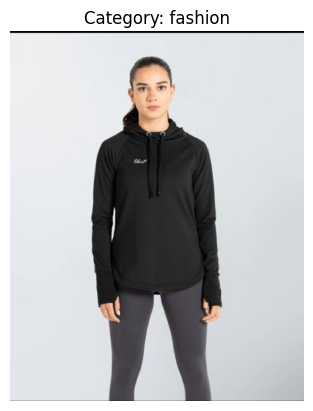

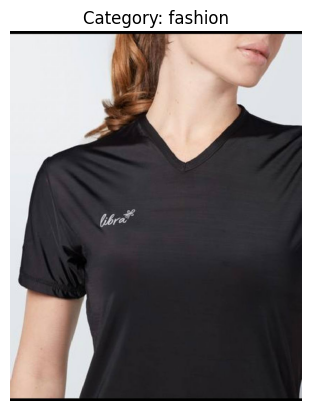

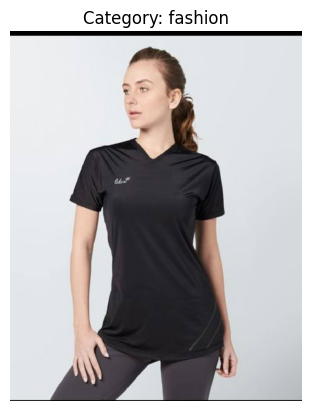

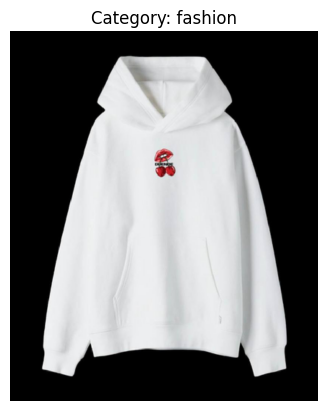

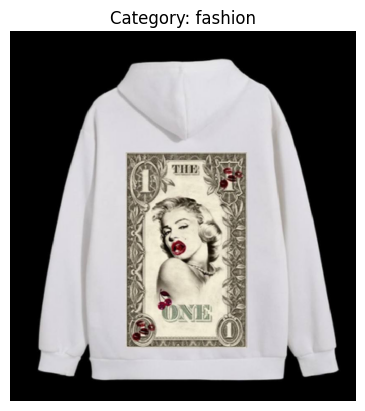

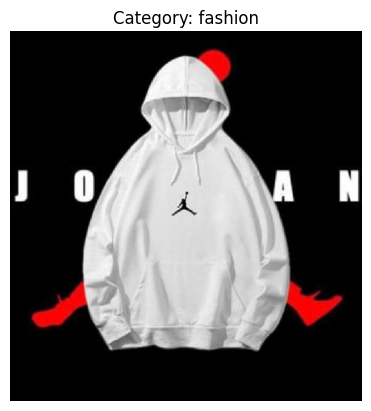

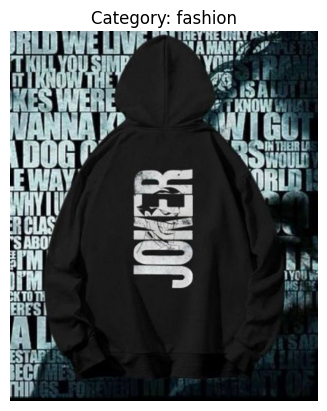

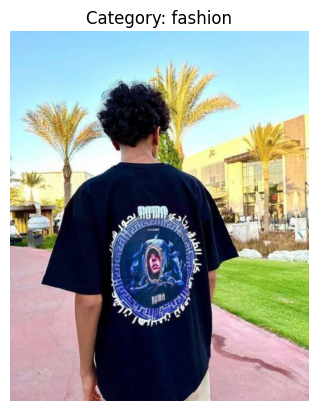

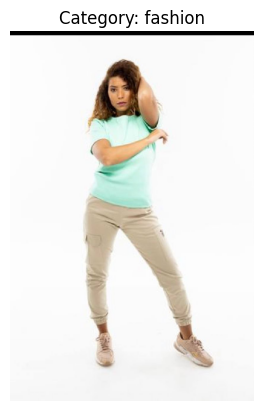

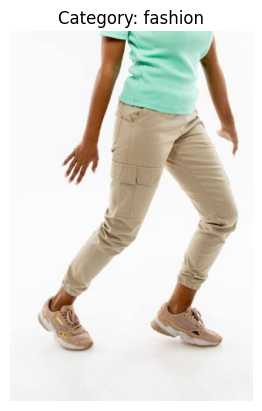

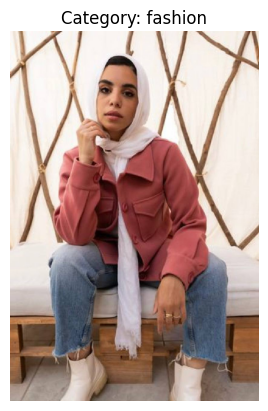

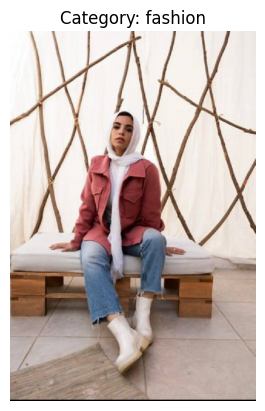

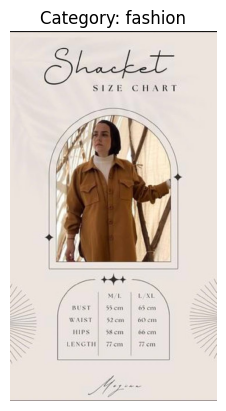

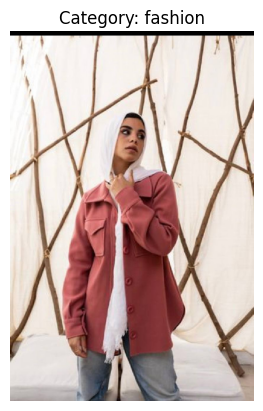

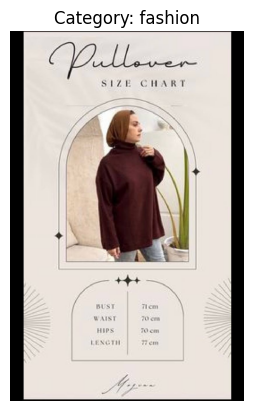

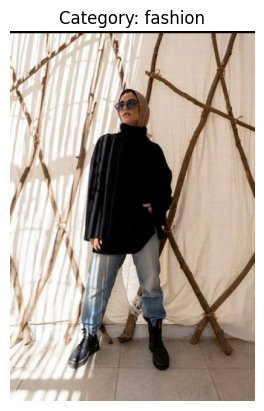

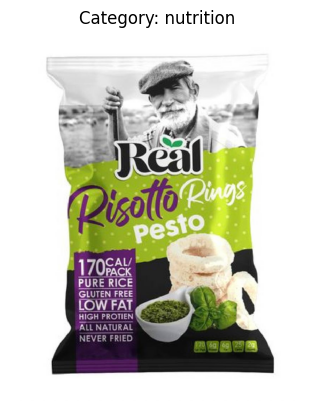

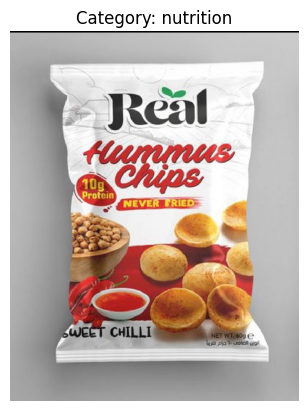

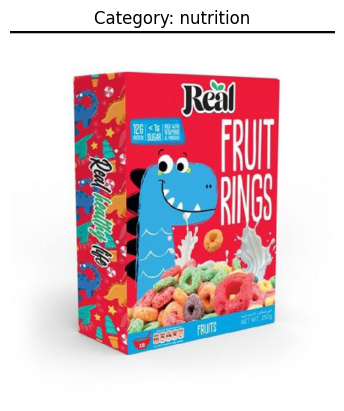

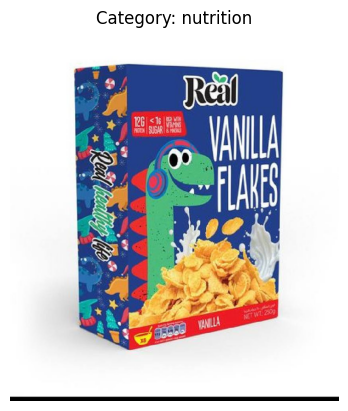

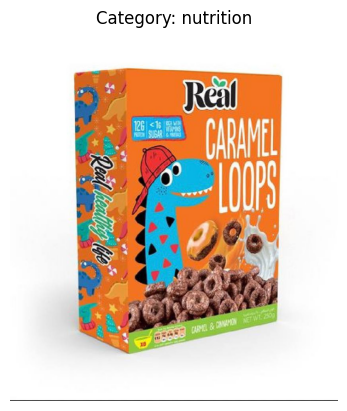

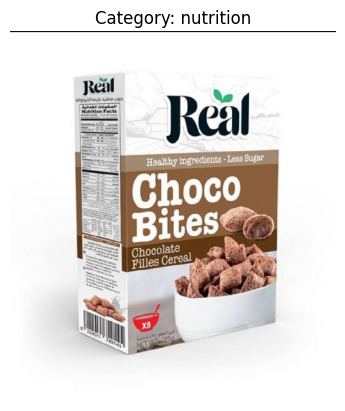

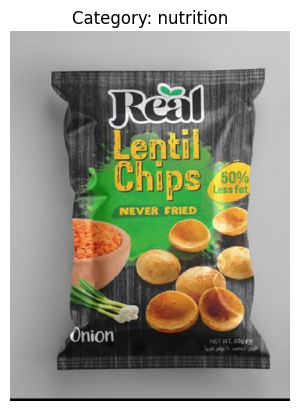

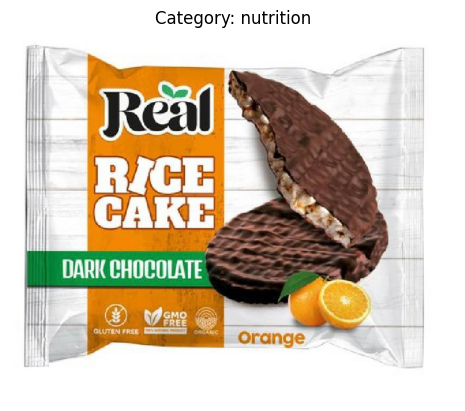

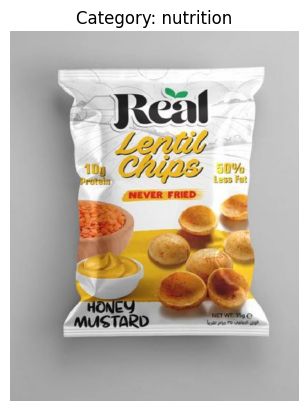

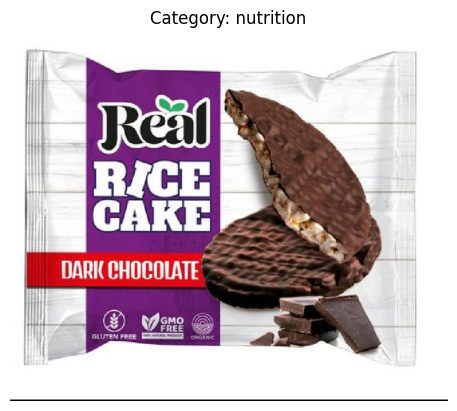

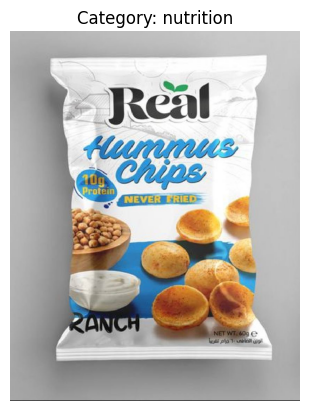

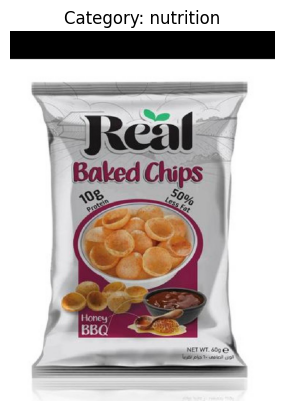

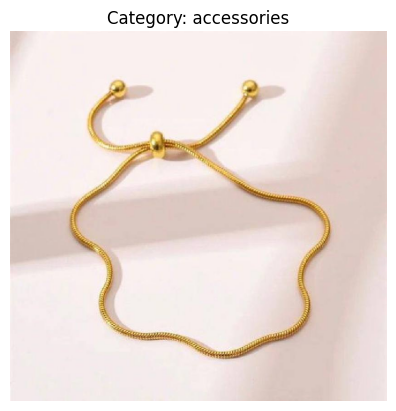

In [18]:
import cv2
import matplotlib.pyplot as plt

# Print sample image paths and their corresponding labels
for i in range(5):  # Print paths and labels for the first 5 images
    print("Image path:", images[i])
    print("Label:", labels[i])
    print()

# Visualize a few images to verify their categories
num_samples_to_visualize = 50
for i in range(num_samples_to_visualize):
    image_path = images[i]
    label = labels[i]

    # Load and display the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR format, convert to RGB
    plt.imshow(image)
    plt.title(f"Category: {categories[label]}")  # Show the category name as title
    plt.axis('off')  # Hide axes
    plt.show()
